 # CNN with Data Augmentation for Makeup vs No Makeup Classification

 ## Step 1: Import Required Libraries

In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import os
import random


2025-10-13 07:54:23.372038: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2025-10-13 07:54:24.206323: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-10-13 07:54:33.349924: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.


 ## Step 2: Define Dataset Paths

In [3]:
train_dir = "./train"
val_dir = "./validation"
test_dir = "./test"


 ## Step 3: Data Augmentation & Generators

In [4]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    zoom_range=0.2,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    horizontal_flip=True,
    fill_mode="nearest"
)

val_test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode="binary"
)

val_generator = val_test_datagen.flow_from_directory(
    val_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode="binary"
)

test_generator = val_test_datagen.flow_from_directory(
    test_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode="binary",
    shuffle=False
)


Found 1219 images belonging to 2 classes.
Found 20 images belonging to 2 classes.
Found 267 images belonging to 2 classes.


 ## Step 4: Build CNN Model

In [5]:
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation="relu", input_shape=(128,128,3)),
    layers.MaxPooling2D(2,2),
    
    layers.Conv2D(64, (3,3), activation="relu"),
    layers.MaxPooling2D(2,2),
    
    layers.Conv2D(128, (3,3), activation="relu"),
    layers.MaxPooling2D(2,2),
    
    layers.Flatten(),
    layers.Dense(128, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])


/usr/local/python/3.12.1/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-10-13 07:54:52.142411: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


 ## Step 5: Compile Model

In [6]:
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])


 ## Step 6: Model Summary

In [7]:
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,304,769 (12.61 MB)

 Trainable params: 3,304,769 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

 ## Step 7: Train Model

In [8]:
history = model.fit(
    train_generator,
    epochs=15,
    validation_data=val_generator
)


/usr/local/python/3.12.1/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15


2025-10-13 07:54:54.940972: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:84] Allocation of 65028096 exceeds 10% of free system memory.
2025-10-13 07:54:55.331375: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:84] Allocation of 30482432 exceeds 10% of free system memory.
2025-10-13 07:54:55.665168: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:84] Allocation of 23482368 exceeds 10% of free system memory.
2025-10-13 07:54:55.912250: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:84] Allocation of 30482432 exceeds 10% of free system memory.
2025-10-13 07:54:55.968715: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:84] Allocation of 25719552 exceeds 10% of free system memory.


39/39 ━━━━━━━━━━━━━━━━━━━━ 60s 1s/step - accuracy: 0.6874 - loss: 0.6314 - val_accuracy: 0.5000 - val_loss: 0.7602
Epoch 2/15
39/39 ━━━━━━━━━━━━━━━━━━━━ 52s 701ms/step - accuracy: 0.7039 - loss: 0.6072 - val_accuracy: 0.5000 - val_loss: 0.8583
Epoch 3/15
39/39 ━━━━━━━━━━━━━━━━━━━━ 42s 719ms/step - accuracy: 0.7039 - loss: 0.6019 - val_accuracy: 0.5000 - val_loss: 0.7383
Epoch 4/15
39/39 ━━━━━━━━━━━━━━━━━━━━ 27s 694ms/step - accuracy: 0.7039 - loss: 0.6291 - val_accuracy: 0.5000 - val_loss: 0.7622
Epoch 5/15
39/39 ━━━━━━━━━━━━━━━━━━━━ 27s 685ms/step - accuracy: 0.7039 - loss: 0.6103 - val_accuracy: 0.5000 - val_loss: 0.8236
Epoch 6/15
39/39 ━━━━━━━━━━━━━━━━━━━━ 24s 624ms/step - accuracy: 0.7039 - loss: 0.6037 - val_accuracy: 0.5000 - val_loss: 0.9405
Epoch 7/15
39/39 ━━━━━━━━━━━━━━━━━━━━ 24s 615ms/step - accuracy: 0.7039 - loss: 0.5954 - val_accuracy: 0.5000 - val_loss: 0.8167
Epoch 8/15
39/39 ━━━━━━━━━━━━━━━━━━━━ 37s 943ms/step - accuracy: 0.7039 - loss: 0.5928 - val_accuracy: 0.5000 -

 ## Step 8: Plot Accuracy & Loss Graphs

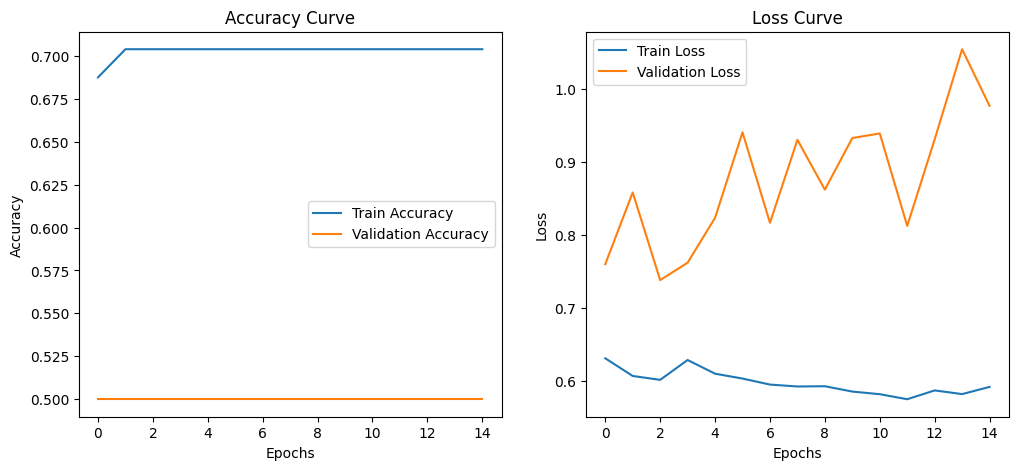

In [9]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label="Train Accuracy")
plt.plot(history.history['val_accuracy'], label="Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Accuracy Curve")

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label="Train Loss")
plt.plot(history.history['val_loss'], label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title("Loss Curve")

plt.show()


 ## Step 9: Evaluate on Test Data

In [10]:
test_loss, test_acc = model.evaluate(test_generator)
print(f"\n✅ Test Accuracy: {test_acc*100:.2f}%")


9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 160ms/step - accuracy: 0.7266 - loss: 0.5763



✅ Test Accuracy: 72.66%


 ## Step 10: Classification Report & Confusion Matrix

9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 158ms/step

Classification Report:

              precision    recall  f1-score   support

      makeup       0.73      1.00      0.84       194
   no_makeup       0.00      0.00      0.00        73

    accuracy                           0.73       267
   macro avg       0.36      0.50      0.42       267
weighted avg       0.53      0.73      0.61       267



/home/codespace/.local/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/codespace/.local/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/codespace/.local/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


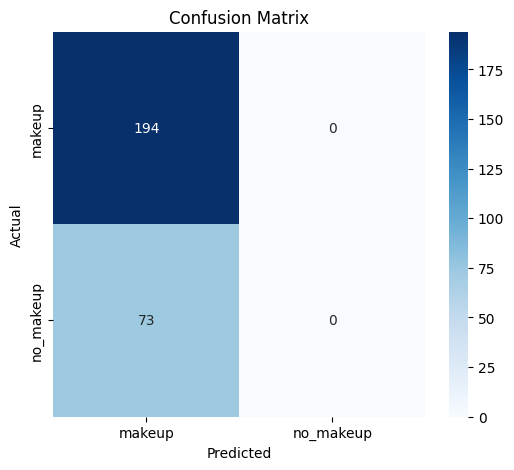

In [11]:
Y_pred = model.predict(test_generator)
y_pred = np.where(Y_pred > 0.5, 1, 0)

print("\nClassification Report:\n")
print(classification_report(test_generator.classes, y_pred, target_names=list(test_generator.class_indices.keys())))

cm = confusion_matrix(test_generator.classes, y_pred)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=list(test_generator.class_indices.keys()),
            yticklabels=list(test_generator.class_indices.keys()))
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


 ## Step 11: Visualize Predictions on Sample Test Images

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


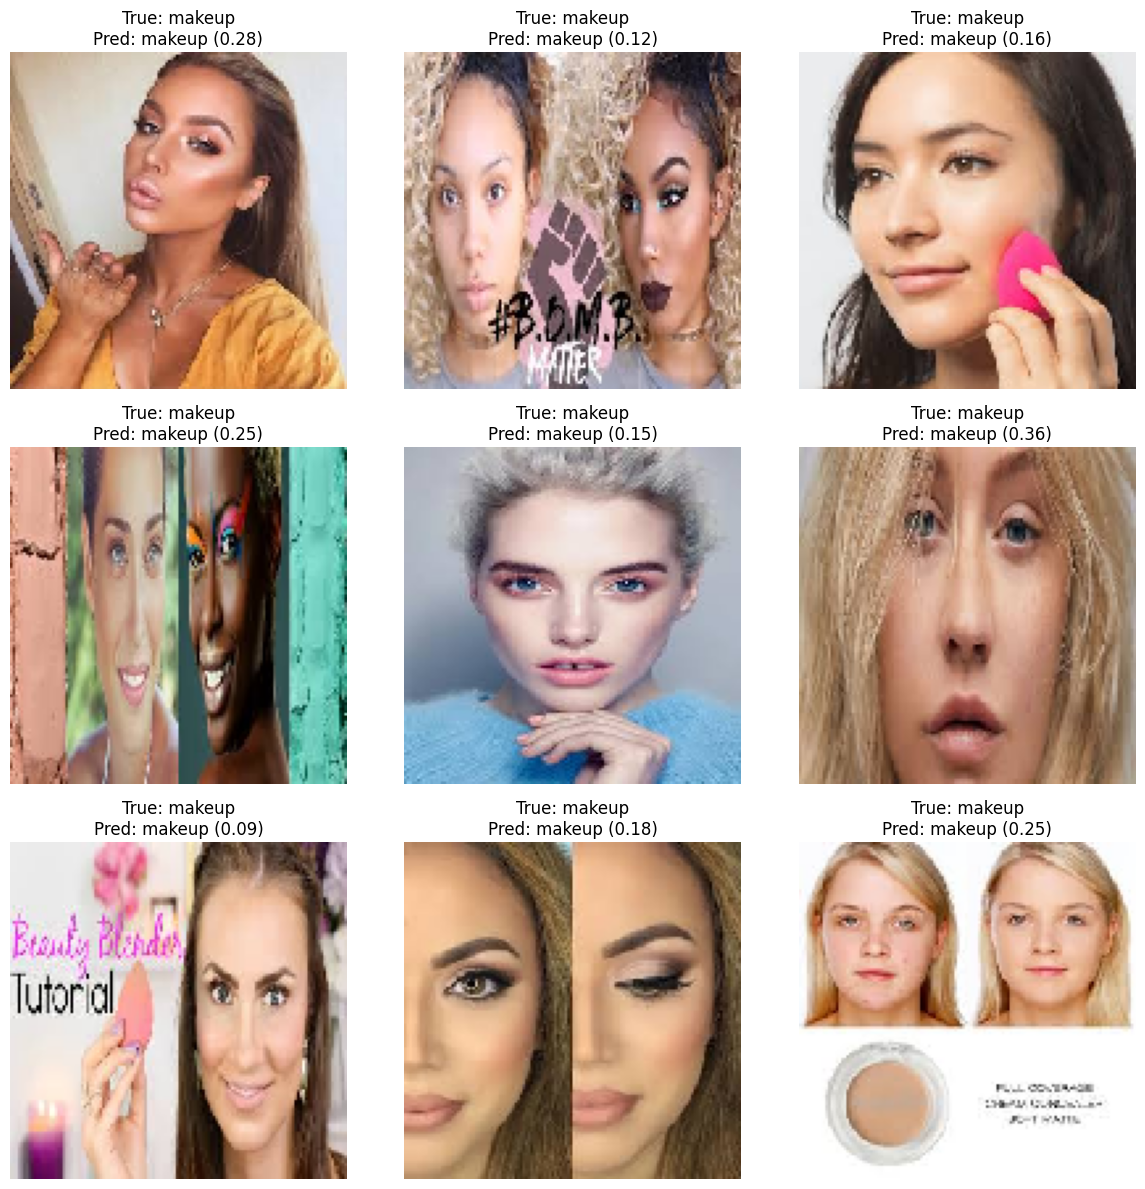

In [12]:
# Get class labels
class_labels = list(test_generator.class_indices.keys())

# Get some random test images
x_test, y_test = next(test_generator)  # one batch of test images

plt.figure(figsize=(12, 12))
for i in range(9):   # show 9 sample images
    plt.subplot(3, 3, i+1)
    img = x_test[i]
    true_label = int(y_test[i])
    pred_prob = model.predict(img[np.newaxis, ...])[0][0]
    pred_label = 1 if pred_prob > 0.5 else 0
    
    plt.imshow(img)
    plt.axis("off")
    plt.title(f"True: {class_labels[true_label]}\nPred: {class_labels[pred_label]} ({pred_prob:.2f})")

plt.tight_layout()
plt.show()
